<a href="https://colab.research.google.com/github/husainattar/Student_Ms_Admit/blob/master/Student_MS_Admit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install beautifultable


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/Colab Notebooks/IA2/binary2.csv' 'binary.csv'


In [0]:
#importing the required library for working
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Reading and Describing the dataset**  

In [0]:
dataset = pd.read_csv('binary.csv')
dataset.head()

,admit,gmat,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [0]:
#Checking for any null or missing data
dataset.apply(lambda x:sum(x.isnull()))

admit    0
gmat     0
gpa      0
rank     0
dtype: int64

In [0]:
#checking the dataset shape  
print(dataset.shape)
#Counting the number of data we have
print(dataset.count)

(400, 4)
<bound method DataFrame.count of      admit  gmat   gpa  rank
0        0   380  3.61     3
1        1   660  3.67     3
2        1   800  4.00     1
3        1   640  3.19     4
4        0   520  2.93     4
..     ...   ...   ...   ...
395      0   620  4.00     2
396      0   560  3.04     3
397      0   460  2.63     2
398      0   700  3.65     2
399      0   600  3.89     3

[400 rows x 4 columns]>


In [0]:
print(dataset.describe())
#Describing the data

            admit        gmat         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


# Visualization

univariant analysis

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


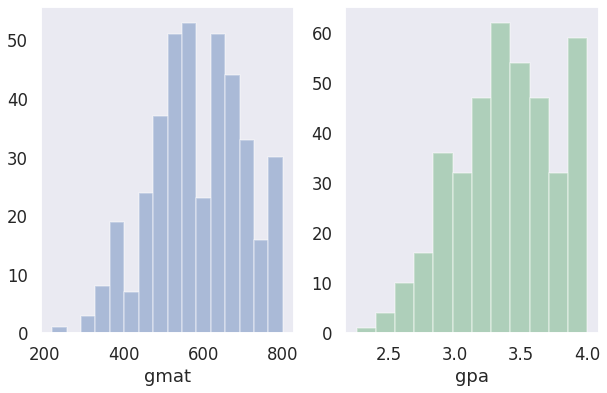

In [0]:
sns.set(style="dark",context="talk")
f,(ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
sns.distplot(dataset.ix[:,1], kde=False, ax=ax1, color="b")
sns.distplot(dataset.ix[:,2], kde=False, ax=ax2, color="g");
plt.show()

Multi-Variant analysis

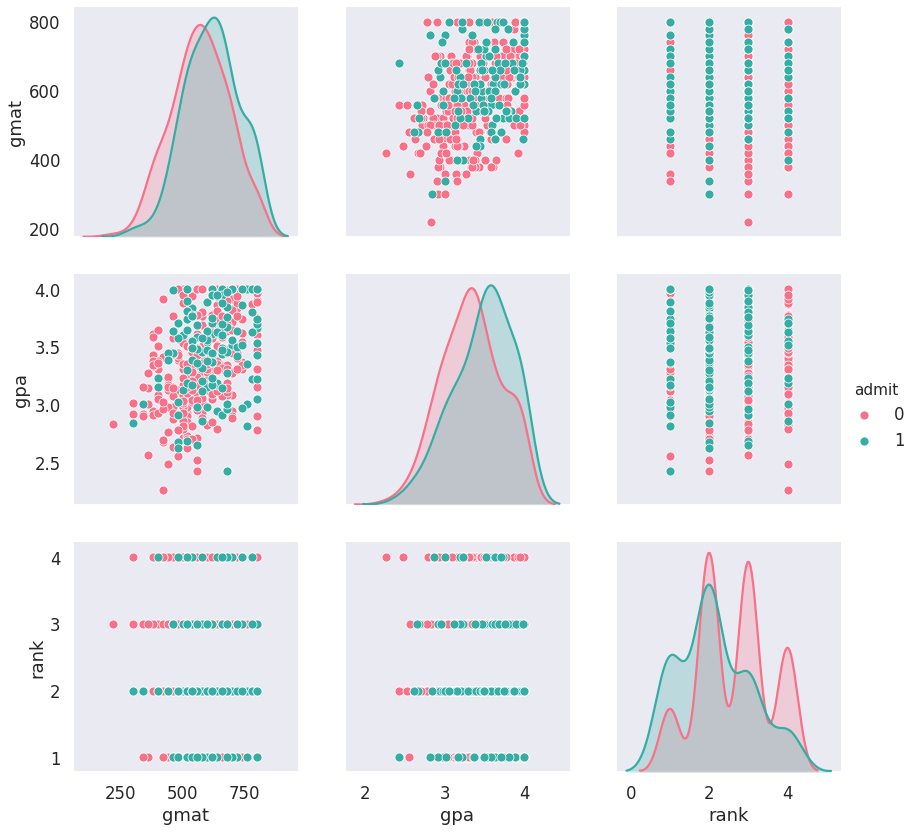

In [0]:
sns.pairplot(dataset, hue='admit',palette="husl", x_vars=["gmat","gpa","rank"], y_vars=["gmat","gpa","rank"], height=4)
plt.show()

## **Data Splitting**

In [0]:
from sklearn.model_selection import train_test_split

#convert dataframe into matrix
dataset = dataset.sample(frac=1)
dataArray = dataset.values

#splitting input features & o/p vars
X = dataArray[:,1:4]
y = dataArray[:,0:1]


In [0]:
#splitting training & testing example
validation_size = 0.10
seed = 9
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=validation_size, random_state = seed)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(360, 3)
(40, 3)
(360, 1)
(40, 1)


# **Logistic Regression**

In [0]:
from scipy.optimize import fmin_tnc

import numpy as np


def sigmoid(x):
    # Sigmoid activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))


def hypothesis(theta, x):
    # Function to calculate hypothesis from input 'x' and 
    # model parameters 'theta'
    return sigmoid(np.dot(x, theta))

def cost(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]                            # m = number of training examples
    total_cost = -(1 / m) * np.sum(
        y * np.log(hypothesis(theta, x)) + (1 - y) * np.log(
            1 - hypothesis(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Calculate partial derivative of cost function wrt theta for
    # optimization function
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, hypothesis(theta,   x) - y)


def fit(theta, x, y):
    # optimize the cost function by using function optimizer fmin_tnc
    opt_weights = fmin_tnc(func=cost, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]

    # predicting  the  value for the test data
def predict(x, parameters):
    theta = parameters[:, np.newaxis]
    return hypothesis(theta, x)

     #accuracy function for logistic regression
def accuracy(x, actual_classes, parameters, probab_threshold=0.5):
    predicted_classes = (predict(x, parameters) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100, predicted_classes

In [0]:
from sklearn.model_selection import train_test_split


# Shuffle the training data for better accuracy
data = dataset.sample(frac=1)

# training data
train, test = train_test_split(data, test_size=0.2)
y = train['admit'].values
y=np.expand_dims(y,axis=1)
x = train.drop(['admit'], axis=1).values


# test data
test_y = test['admit'].values
test_x = test.drop(['admit'], axis=1).values
test_x = np.c_[np.ones((test_x.shape[0], 1)), test_x]

# Initialize theta
x = np.c_[np.ones((x.shape[0], 1)), x]
y = y[:, np.newaxis]
theta = np.zeros((x.shape[1], 1))


# fit the model
model_params = fit(theta, x, y)
print(f'Model parameters: {model_params}')

# find model accuracy
model_accuracy, predictions = accuracy(test_x, test_y.flatten(), model_params, 0.5)
print(f'Model accuracy: {model_accuracy}')

Model parameters: [-2.25371827e+00  1.64447409e-03  5.25329969e-01 -5.10651648e-01]
Model accuracy: 78.75


**Results**

In [0]:
# Evaluating the model
# creating the confusion matrix
from beautifultable import BeautifulTable

tp = 0
tn = 0
fp = 0
fn = 0

for i in range(len(predictions)):
    if predictions[i] == 1 and test_y[i] == 1:
        tp += 1
    elif predictions[i] == 0 and test_y[i] == 0:
        tn += 1
    elif predictions[i] == 0 and test_y[i] == 1:
        fp += 1
    elif predictions[i] == 1 and test_y[i] == 0:
        fn += 1

conf_matrix = BeautifulTable()
conf_matrix.column_headers = ['', 'Actual', 'False', 'Total']
conf_matrix.append_row(['Positive', tp, fp, tp+fp])
conf_matrix.append_row(['Negative', tn, fn, tn+fn])
conf_matrix.append_row(['Total', tp+tn, fp+fn, tp+tn+fp+fn])
print('Confusion matrix:')
print('Predicted ->')
print('Actual v')
print(conf_matrix)

Confusion matrix:
Predicted ->
Actual v
+----------+--------+-------+-------+
|          | Actual | False | Total |
+----------+--------+-------+-------+
| Positive |   3    |  17   |  20   |
+----------+--------+-------+-------+
| Negative |   60   |   0   |  60   |
+----------+--------+-------+-------+
|  Total   |   63   |  17   |  80   |
+----------+--------+-------+-------+


In [0]:
print('Model evaluation:')
total = tp+tn+fp+fn
print(f'Accuracy = {(tp+tn)/total}')
print(f'Error rate = {(fp+fn)/total}')
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F-score = {(2*precision*recall) / (precision+recall)}')

Model evaluation:
Accuracy = 0.7875
Error rate = 0.2125
Precision = 0.15
Recall = 1.0
F-score = 0.2608695652173913
